In [1]:
# import all required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # formating data categorical to numerical
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import  SVC
from sklearn.decomposition import PCA
#from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

## Project Name : Abalone Age prediction

- We have Abalone Dataset, The Main Aim of this Project is to Predicting the Age of Abalone from physical measurements. 

- Its age can be estimated counting the number of rings in their shell with a microscope, but it is a time consuming process,     in this project we will use Machine Learning to predict the age using physical measurements.

## Step 1: Exploratory data analysis (EDA)
- read the data
- variable identification # looking the input data # what will be the output variable
- univariate analysis - tacking small small variable and plot bar chart and finding histogram
- Bivariate analysis - tacking two column or two variable and looking the relationship between the,and also find correlation     and covariance within two variable
- handling and removing null values- missing data
- Handling Categorical Variabl
- finding outliers

In [2]:
# Loading the dataset.
abalone = pd.read_csv('abalone_dataset.csv')
abalone.head()


,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [3]:
# There are no column labels in the abalone dataset,so we copy them from the documentation.
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
abalone = pd.read_csv("abalone_dataset.csv", names=column_names)
print("Number of samples: %d" % len(abalone))
abalone.head()

Number of samples: 4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7



## Given is the attribute name, attribute type, the measurement unit and a brief description. 
## The number of rings is the value to predict: either as a continuous value or as a                          classification problem.

# Description of Key features:
- Sex:- sex of abalone(M, F, and I (infant))
- Length:- Longest shell measurement of abalone(mm)
- Diameter:-perpendicular to length(mm)
- Height:- height of ablone with meat in shell(mm)
- Whole weight:- whole abalone weight(g)
- Shucked weigh:- weight of meat only(g)
- Viscera weight:- gut weight,after bleeding(g)
- Shell weight	:- after being dried(g)
- Rings	:- +1.5 gives the age in years


# Type of variables data
- sex feature is nominal in nature
- all features are  continuous  in nature
- rings it is a integer

# Univariate Analysis

In [4]:
# let's check the datatypes of all feature which present in dataset
abalone.dtypes

# its show we have all feature in int and float64 excluding sex

sex                object
length            float64
diameter          float64
height            float64
whole weight      float64
shucked weight    float64
viscera weight    float64
shell weight      float64
rings               int64
dtype: object

In [5]:
# now check feature name of abalone dataset
abalone.columns

Index(['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight',
       'viscera weight', 'shell weight', 'rings'],
      dtype='object')

In [6]:
# now check detail information of abalone dataset
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole weight    4177 non-null   float64
 5   shucked weight  4177 non-null   float64
 6   viscera weight  4177 non-null   float64
 7   shell weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
# let's finding null and nan values whether it is available in dataset

print('total number of null values:\n',abalone.isnull().sum())
print('\n')
print('total number of Nan values:\n',abalone.isna().sum())


total number of null values:
 sex               0
length            0
diameter          0
height            0
whole weight      0
shucked weight    0
viscera weight    0
shell weight      0
rings             0
dtype: int64


total number of Nan values:
 sex               0
length            0
diameter          0
height            0
whole weight      0
shucked weight    0
viscera weight    0
shell weight      0
rings             0
dtype: int64


## observation
- this dataset has 1477 rows with 9 features.
- no missinh values in the dataset
- all features are not normaly distributed, are close to normality     

In [8]:
# From problem statement and feature discription, 
# let's first compute the target varible of the problem ' Age' and assign it to the dataset. Age = 1.5+Rings
abalone['age']=abalone['rings']+1.5
abalone['age']

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: age, Length: 4177, dtype: float64

In [9]:
abalone.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [10]:
# let's drop the rings feature from dataset
abalone.drop('rings',axis=1,inplace=True)

In [11]:
abalone.head(2)

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,8.5


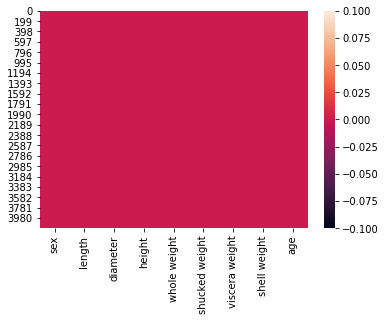

In [12]:
# let's visualize null values using heatmap
sns.heatmap(abalone.isnull())

In [13]:
# univariate analysis of continuous and dicrete data variable using a describe() function
# describe function provide  statistics summary of continuous variable.

abalone.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [14]:
col= abalone.columns.values

#now we check hom many unique values in each columns

list((columns,np.unique(abalone[columns].astype(str)).size) for columns in col)

# height number of unique values is present in 'whole weight' feature 
# sex column have only three unique value


[('sex', 3),
 ('length', 134),
 ('diameter', 111),
 ('height', 51),
 ('whole weight', 2429),
 ('shucked weight', 1515),
 ('viscera weight', 880),
 ('shell weight', 926),
 ('age', 28)]

In [15]:
#1.by creating frequency table for categorical variable smoker
abalone.sex.value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [16]:
abalone.age.value_counts()

10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
25.5      2
28.5      2
3.5       1
30.5      1
2.5       1
27.5      1
26.5      1
Name: age, dtype: int64

length               AxesSubplot(0.125,0.657941;0.227941x0.222059)
diameter          AxesSubplot(0.398529,0.657941;0.227941x0.222059)
height            AxesSubplot(0.672059,0.657941;0.227941x0.222059)
whole weight         AxesSubplot(0.125,0.391471;0.227941x0.222059)
shucked weight    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
viscera weight    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
shell weight            AxesSubplot(0.125,0.125;0.227941x0.222059)
age                  AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

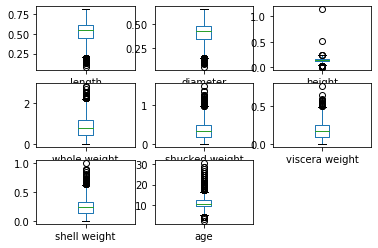

In [17]:
# univariate data analysis by graphical representation

# lets find out the outliers by ploting box plot using single column

abalone.plot(kind='box',subplots=True,layout=(3,3))

In [18]:
collist=abalone.columns.values
ncol=12
nrows=10

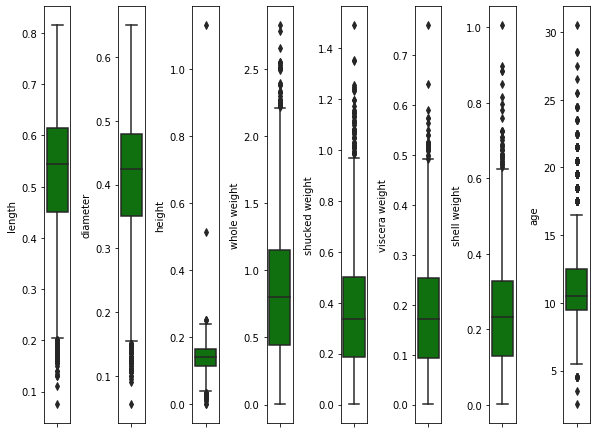

In [19]:
plt.figure(figsize=(ncol,ncol*5))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(abalone[collist[i]],color='green',orient='v')
    plt.tight_layout()

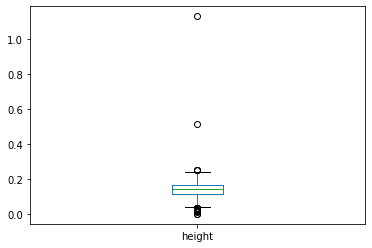

In [20]:
abalone['height'].plot.box()

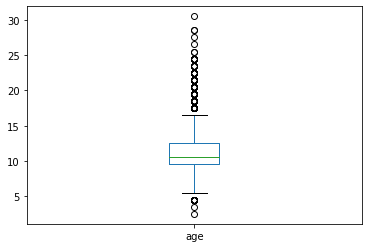

In [21]:
abalone['age'].plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023179F4EA08>,
      dtype=object)

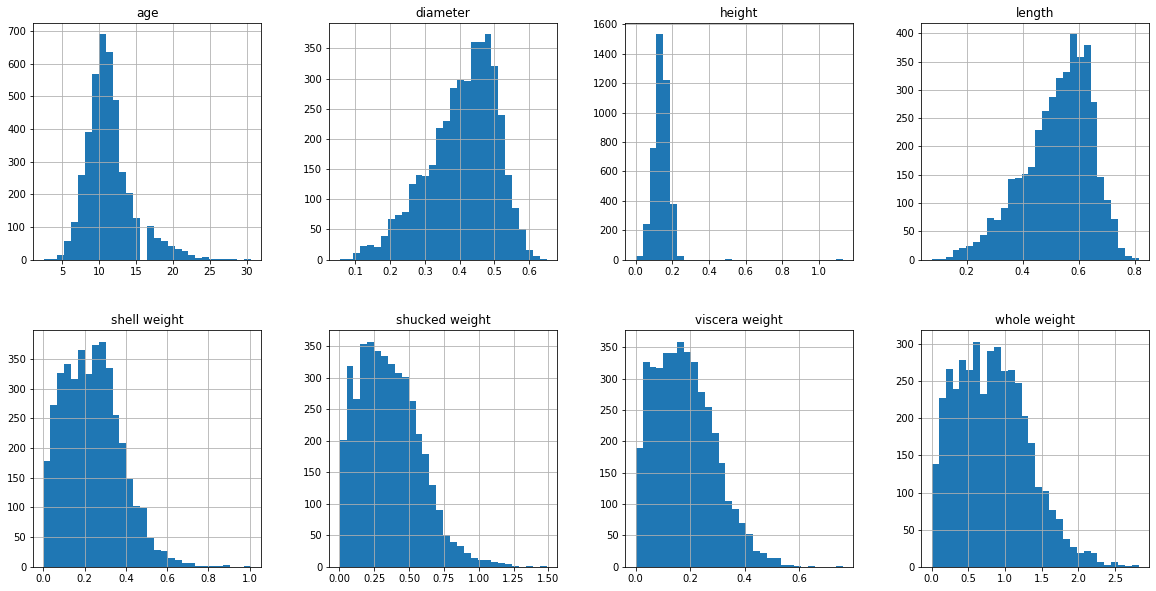

In [22]:
# let's plot histogram to check all feature in the dataset whether normal distribution or n
abalone.hist(figsize=(20,10),layout=(2, 4), bins = 30)

In [23]:
# let's check skewdness of data using skew () function
abalone.skew()

length           -0.639873
diameter         -0.609198
height            3.128817
whole weight      0.530959
shucked weight    0.719098
viscera weight    0.591852
shell weight      0.620927
age               1.114102
dtype: float64

In [24]:
# sex feature is nominal in nature so we need to change in numerical form 
# for that we will use LabelEncorder() techniques
le = LabelEncoder()
abalone['sex']=le.fit_transform(abalone['sex'])
abalone['sex']


0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: sex, Length: 4177, dtype: int32

In [25]:
for col in abalone.columns:
    if abalone.skew().loc[col]>0.55:
        abalone[col]=np.log1p(abalone[col])

In [26]:
abalone.skew()

sex              -0.098155
length           -0.639873
diameter         -0.609198
height            1.099602
whole weight      0.530959
shucked weight    0.306439
viscera weight    0.375637
shell weight      0.315321
age               0.102513
dtype: float64

- 1.Height has highest skewedness followed by age, Shucked weight.
- 2.above box plot repersent huge outliers are present in the height, age, followed by shucked weight,shell weight.
- 3.other independent variables are not scaled. so need to be scaled using standard scalar method.
- so we need to remove outliers and skewedness of data.

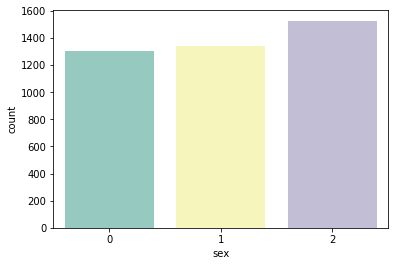

In [27]:

sns.countplot(x = 'sex', data = abalone, palette="Set3",)

In [28]:
abalone.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,age
0,2,0.455,0.365,0.090754,0.5140,0.202533,0.096219,0.139762,2.862201
1,2,0.350,0.265,0.086178,0.2255,0.094856,0.047361,0.067659,2.251292
2,0,0.530,0.420,0.126633,0.6770,0.228330,0.132343,0.190620,2.442347
3,2,0.440,0.365,0.117783,0.5160,0.195156,0.107957,0.144100,2.525729
4,1,0.330,0.255,0.076961,0.2050,0.085719,0.038740,0.053541,2.251292


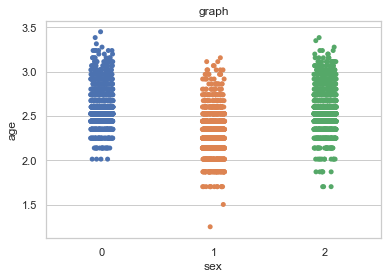

In [29]:
sns.set(style='whitegrid')
ax=sns.stripplot(x='sex',y='age', data=abalone)
plt.title('graph')
plt.show()

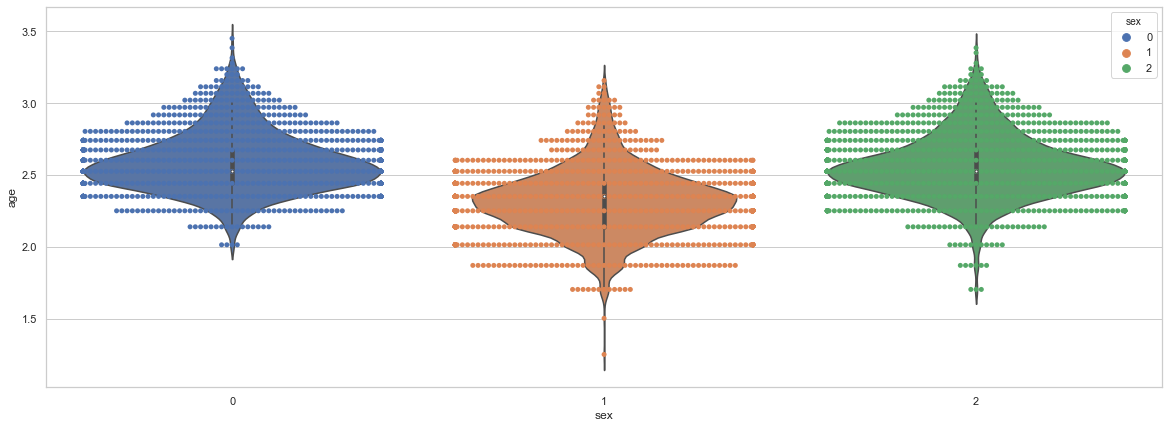

In [30]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'sex', y = 'age', data =abalone, hue ='sex')
sns.violinplot(x = 'sex', y = 'age', data =abalone )

- Male (2): age majority lies in between 7.5 years to 19 years
- Female(0):age majority lies in between 8 years to 19 years
- Infant(1):age majority lies in between 6 years to < 10 years

In [31]:
# now we will use correlation matrix
data=abalone.corr()
data

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,age
sex,1.000000,-0.036066,-0.038874,-0.041791,-0.021391,-0.006385,-0.033027,-0.035056,-0.032540
length,-0.036066,1.000000,0.986812,0.861737,0.925261,0.927299,0.918854,0.919398,0.636471
diameter,-0.038874,0.986812,1.000000,0.867742,0.925452,0.922808,0.915792,0.926637,0.652097
height,-0.041791,0.861737,0.867742,1.000000,0.846682,0.824234,0.838257,0.860933,0.641401
whole weight,-0.021391,0.925261,0.925452,0.846682,1.000000,0.971167,0.967569,0.957923,0.589466
shucked weight,-0.006385,0.927299,0.922808,0.824234,0.971167,1.000000,0.940721,0.902684,0.511192
viscera weight,-0.033027,0.918854,0.915792,0.838257,0.967569,0.940721,1.000000,0.920699,0.574310
shell weight,-0.035056,0.919398,0.926637,0.860933,0.957923,0.902684,0.920699,1.000000,0.678737
age,-0.032540,0.636471,0.652097,0.641401,0.589466,0.511192,0.574310,0.678737,1.000000


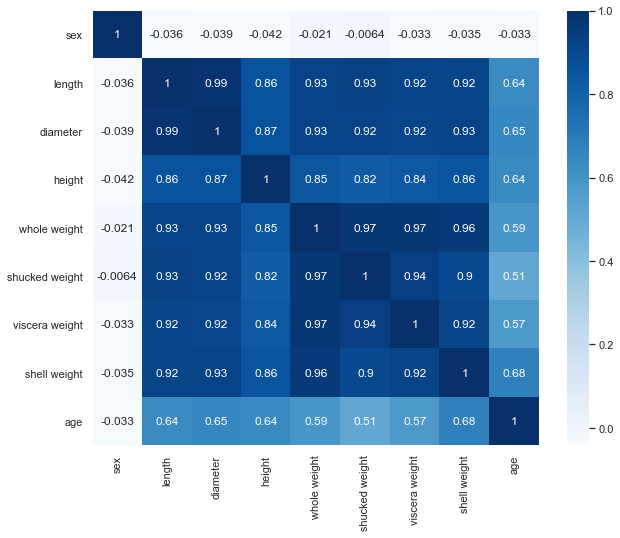

In [32]:
# now we ploting correlation matrix using heatmap to make batter understanding.

plt.figure(figsize=(10,8))
sns.heatmap(data,cmap='Blues',annot=True) # annot attribute show correlation value in heatmap

# from the this graph we say that dark shade is highly correlated

- dark shades are highly correlated with each other
- the whole weight feature is highly positive correlated with all other features except age.
- Heigh has least linearity with remaining features
- Age is least correlated with Shucked Weigh
- Age is highly positive correlated with shell weight followed by diameter and length

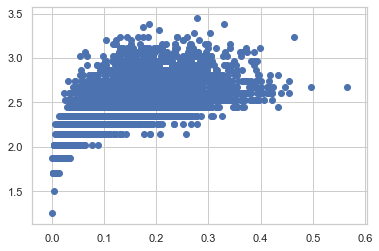

In [33]:
# now we will use scatter plot to no how key feature is correlated with age
plt.scatter(x = abalone['viscera weight'], y = abalone['age'],)
plt.grid(True)


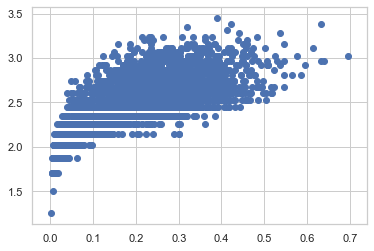

In [34]:
plt.scatter(x = abalone['shell weight'], y = abalone['age'],)
plt.grid(True)

# below graph show shell weight is positively correlated with age

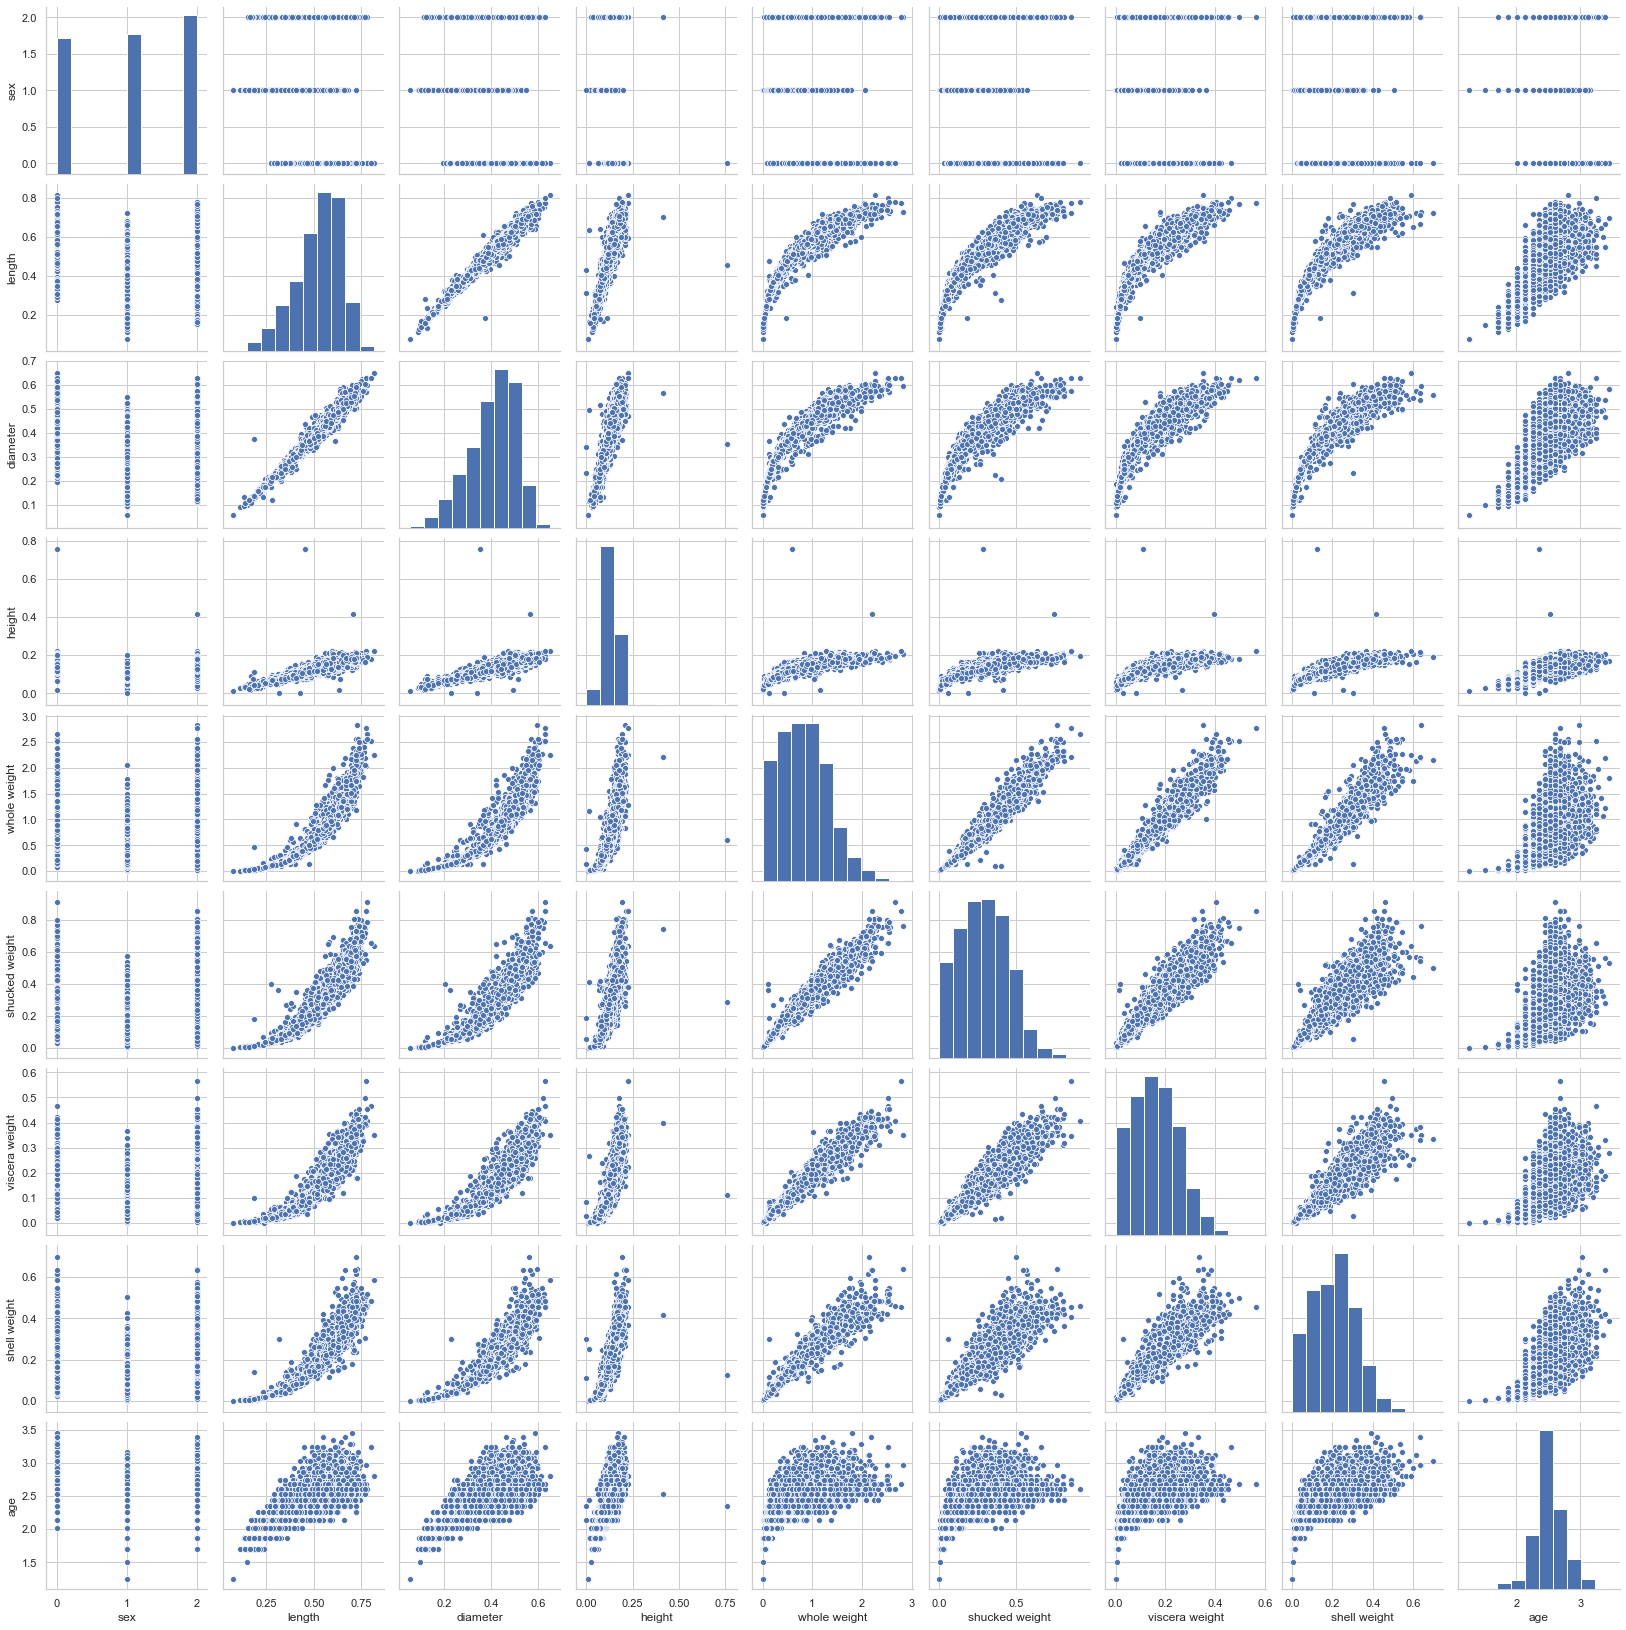

In [35]:
# now we use pairplot 
sns.pairplot(abalone)

In [36]:
# lets remove the outliers by using zscore fuction.
from scipy.stats import zscore

z_score=abs(zscore(abalone))
print(abalone.shape)
abalone=abalone.loc[(z_score<3).all(axis=1)]
print(abalone.shape)

(4177, 9)
(4094, 9)


## above we removed outliers using zscore statistical method.

In [37]:
# let's seprate abalone dataset into input and target variable
# x- hold all input variable 
# y- hold target variable 

x= abalone.iloc[:,0:8]
x.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight
0,2,0.455,0.365,0.090754,0.5140,0.202533,0.096219,0.139762
1,2,0.350,0.265,0.086178,0.2255,0.094856,0.047361,0.067659
2,0,0.530,0.420,0.126633,0.6770,0.228330,0.132343,0.190620
3,2,0.440,0.365,0.117783,0.5160,0.195156,0.107957,0.144100
4,1,0.330,0.255,0.076961,0.2050,0.085719,0.038740,0.053541


In [38]:
y=abalone['age']
y.head

<bound method NDFrame.head of 0       2.862201
1       2.251292
2       2.442347
3       2.525729
4       2.251292
          ...   
4172    2.602690
4173    2.525729
4174    2.442347
4175    2.525729
4176    2.674149
Name: age, Length: 4094, dtype: float64>

In [39]:
# checking shape of both x and y
print(x.shape)
print(y.shape)

(4094, 8)
(4094,)


In [40]:
# here using StandardScaler, we will scaling all input feature values.

scale = StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.15338768, -0.60053263, -0.45078691, ..., -0.58619706,
        -0.73040037, -0.6294835 ],
       [ 1.15338768, -1.50914696, -1.49628976, ..., -1.28800802,
        -1.28308285, -1.31168384],
       [-1.27936304,  0.04847761,  0.12423965, ..., -0.41805583,
        -0.32176377, -0.1482901 ],
       ...,
       [ 1.15338768,  0.6542205 ,  0.69926622, ...,  0.84633426,
         1.03973309,  0.58855567],
       [-1.27936304,  0.87055724,  0.8038165 , ...,  0.86979089,
         0.80447511,  0.50135292],
       [ 1.15338768,  1.60610218,  1.5356685 , ...,  2.43142732,
         1.79584295,  1.85285786]])

# Split data in Training and Test sets

We can split the data into training and validation sets and use Machine Learning to create an estimator that can learn from the training set and then check its performance on the test set.

## the abalone age prediction is continuous variable , so we applied regression model to predict our output.
- 
- we need to predict continous variable which is abalone age Linear regression model 
- we also used different supervised model  to check and compare whether we get high r2score or not, this exercise help us to   select best model 

## let's we use list of given algorithm below:
 1. LinearRegression(lr)
 2. DecissionTreesclassifiers(dt)
 3. support Vactore machin(svc)
 4. regularization model (lasso,ridgo)
 

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=60)

In [42]:
print(x_train.shape,y_train.shape)

(3193, 8) (3193,)


In [43]:
print(x_test.shape,y_test.shape)

(901, 8) (901,)


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

# train linear regression model

ln=LinearRegression()
ln.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
 ln.coef_

array([ 0.00419542,  0.01584054,  0.11250419,  0.08701847,  0.11576686,
       -0.25590338, -0.04339104,  0.11985003])

In [46]:
ln.intercept_

2.490386308276217

In [47]:
ln.score(x_train,y_train) 

0.5586767745766099

In [48]:
# predict the output
y_predln=ln.predict(x_test)
print(r2_score(y_test,y_predln))
print("means square error:",mean_squared_error(y_test,y_predln))
print("mean absolute error:",mean_absolute_error(y_test,y_predln))


0.5669152563845549
means square error: 0.024835934938310118
mean absolute error: 0.12242233329092402


In [49]:
# lets check r2 score using other regression model with cross_val techniques
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
# will reduce the coefficient to zero by using lasso algorithm for avoid underffiting,overfitting and bias/variance trade off
# into the dataset.
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [50]:
# using loop we call one by one model for check r2_score and also use support matrix to make clear understanding
models=[Lasso(),Ridge(),ElasticNet()]
for m in models:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('\n')
    print ('model score:',m.score(x_train,y_train))
    print(m.coef_)
    print (m.intercept_)
#coef.plot(kind='bar',title='model coefficient')



model score: 0.0
[-0.  0.  0.  0.  0.  0.  0.  0.]
2.490999726622998


model score: 0.5586690444177356
[ 0.00415807  0.01606364  0.11115486  0.08696972  0.11069071 -0.25262433
 -0.0421331   0.12164899]
2.4903939990738735


model score: 0.0
[-0.  0.  0.  0.  0.  0.  0.  0.]
2.490999726622998


In [51]:
# after seen above three model score, we find that among the three model the ridge regression model is performing well.
# for that we plot the graph of magnitude of coefficient of ridge model to get more understanding .
# now ridge algoritham avoid bias/variance trade of into the dataset , it will try to reduce the coefficient variace

rd=Ridge()
rd.fit(x_train,y_train)
print(rd.score(x_train,y_train))
print(rd.coef_)

plt.show()

0.5586690444177356
[ 0.00415807  0.01606364  0.11115486  0.08696972  0.11069071 -0.25262433
 -0.0421331   0.12164899]


In [52]:
# lets use knn model to increse r2 score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

neighbors = {"n_neighbors":range(1,30)}
knn= KNeighborsRegressor()
gknn=GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 18}

In [53]:
knn= KNeighborsRegressor(n_neighbors=18)
knn.fit(x_train,y_train)
y_predln=ln.predict(x_test)
print(r2_score(y_test,y_predln))
print("means square error:",mean_squared_error(y_test,y_predln))
print("mean absolute error:",mean_absolute_error(y_test,y_predln))


0.5669152563845549
means square error: 0.024835934938310118
mean absolute error: 0.12242233329092402


In [54]:
 dtc= DecisionTreeRegressor()
dtc.fit(x_train,y_train)
y_predln=ln.predict(x_test)
print(r2_score(y_test,y_predln))
print("means square error:",mean_squared_error(y_test,y_predln))
print("mean absolute error:",mean_absolute_error(y_test,y_predln))


0.5669152563845549
means square error: 0.024835934938310118
mean absolute error: 0.12242233329092402


## I used multiple algorithms to  get highest r2 score but we get same r2 score after using all  except ridge.

- we will use Linear regression as final model

- So we save model Linear Regression for production.


In [55]:
ln=LinearRegression()
ln.fit(x_train,y_train)
#predict the output
y_predln=ln.predict(x_test)
print(r2_score(y_test,y_predln))
print("means square error:",mean_squared_error(y_test,y_predln))
print("mean absolute error:",mean_absolute_error(y_test,y_predln))


0.5669152563845549
means square error: 0.024835934938310118
mean absolute error: 0.12242233329092402


In [56]:
from sklearn.externals import joblib
# save the model as a pickle in a file
joblib.dump(ln,'abalone.pkl')

['abalone.pkl']